# Employee Attrition Prediction Model

Employee attrition refers to the phenomenon of employees leaving a company voluntarily or involuntarily. By visualizing employee data and by utilizing machine learning models, historical employee data can be leveraged to predict attrition probability based on several factors. Predictive analysis enables proactive measures to be taken by organizations to mitigate attrition, such as improving workplace conditions or implementing retention strategies.

### Importing Libraries

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

## Data Exploration, Transformation & Cleaning

In [127]:
df = pd.read_csv("Employee Attrition Data.csv")
pd.set_option('display.max_columns', 30)
df.head(5)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [128]:
# viewing the shape of the dataset
df.shape

(4410, 29)

In [129]:
# viewing the datasets information
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 29 entries, EmployeeID to PerformanceRating
dtypes: float64(5), int64(16), object(8)
memory usage: 999.3+ KB


In [130]:
# viewing the columns of teh dataset
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [131]:
# checking for null values
df.isnull().sum()[df.isnull().sum().values > 0]

NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [132]:
# checking the datatypes of each column
df.dtypes

EmployeeID                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating   

In [133]:
# dropping null values
df = df.dropna()
df.shape

(4300, 29)

In [134]:
# renaming column 'education'
df = df.rename(columns = {'Education' : 'EducationLevel'})

In [135]:
df['EmployeeCount'].unique()

array([1], dtype=int64)

In [136]:
# dropping 'employeecount' column
df = df.drop(columns = 'EmployeeCount')

In [137]:
# converting columns that have data types as float to int
float_cols = ['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
for col in float_cols:
    df[col] = df[col].astype(int)

In [138]:
# creating a new column 'age group'
age_bins = [18, 29, 49, 60]
age_labels = ['Young Adult', 'Middle-Aged Adult', 'Older Adult']

df['AgeGroup'] = pd.cut(df['Age'], bins = age_bins, labels = age_labels, right = False)

In [139]:
# viewing the final dataset
df.head(3)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationLevel,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,AgeGroup
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1,Y,11,8,0,1,6,1,0,0,3,4,2,3,3,Older Adult
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0,Y,23,8,1,6,3,5,1,4,3,2,4,2,4,Middle-Aged Adult
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1,Y,15,8,3,5,2,5,0,3,2,2,1,3,3,Middle-Aged Adult


In [140]:
# exporting the transformed dataframe for visualizing it in tableau later
transformed_dataset_path = 'employee_attrition_data_transformed.xlsx'
df.to_excel(transformed_dataset_path, index = False)

## Attrition Prediction Model

In [141]:
# loading the dataset
df = pd.read_excel('employee_attrition_data_transformed.xlsx')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationLevel,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,AgeGroup
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1,Y,11,8,0,1,6,1,0,0,3,4,2,3,3,Older Adult
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0,Y,23,8,1,6,3,5,1,4,3,2,4,2,4,Middle-Aged Adult
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1,Y,15,8,3,5,2,5,0,3,2,2,1,3,3,Middle-Aged Adult
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3,Y,11,8,3,13,5,8,7,5,4,4,3,2,3,Middle-Aged Adult
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4,Y,12,8,2,9,2,6,0,4,4,1,3,3,3,Middle-Aged Adult


In [142]:
# encoding the non-numeric columns using one-hot encoding
encoded_df = pd.get_dummies(df, columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18'])
encoded_df.head()

,EmployeeID,Age,Attrition,DistanceFromHome,EducationLevel,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,...,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,1,51,No,6,2,1,131160,1,11,8,0,1,6,1,0,...,True,False,True,False,False,False,False,False,False,False,False,False,True,False,True
1,2,31,Yes,10,1,1,41890,0,23,8,1,6,3,5,1,...,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
2,3,32,No,17,4,4,193280,1,15,8,3,5,2,5,0,...,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True
3,4,38,No,2,5,3,83210,3,11,8,3,13,5,8,7,...,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True
4,5,32,No,10,1,1,23420,4,12,8,2,9,2,6,0,...,False,True,False,False,False,False,False,False,False,True,False,False,False,True,True


In [143]:
# splitting the dataset into features and target variables
y = encoded_df['Attrition']
X = encoded_df.drop(['EmployeeID', 'Attrition', 'JobLevel', 'StandardHours', 'AgeGroup'], axis = 1)

In [144]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [145]:
# fitting the model using gradient boosting classifier
clf = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 15, max_depth = 12).fit(X_train, y_train)

In [146]:
# training and testing accuracy scores of the model
print('Training Accuracy of Model: {:.2f}%'.format(clf.score(X_train, y_train)*100))
print('Testing Accuracy of Model: {:.2f}%'.format(clf.score(X_test, y_test)*100))

Training Accuracy of Model: 99.44%
Testing Accuracy of Model: 97.02%


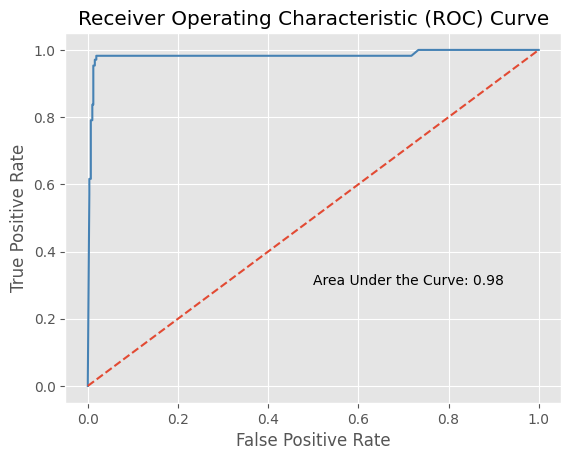

In [153]:
# plotting an roc curve and calculating auc
model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 15, max_depth = 12)
y_score = model.fit(X_train, y_train).predict_proba(X_test)
y_test = y_test.replace('Yes', 1)
y_test = y_test.replace('No', 0)
fpr, tpr, t = roc_curve(y_test, y_score[:, 1])
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, color = 'steelblue')
plt.plot([0, 1], linestyle = '--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.5, 0.3, 'Area Under the Curve: {:.2f}'.format(auc_score), color = 'black')
plt.show()

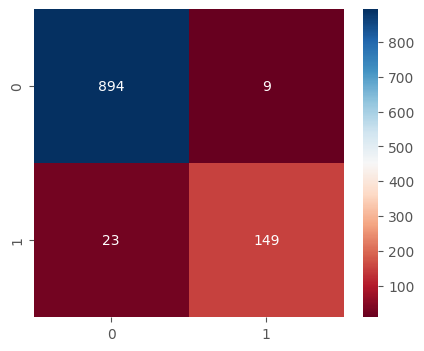

In [152]:
# confusion matrix
y_pred = clf.predict(X_test)
plt.figure(figsize = (5, 4))
y_test = y_test.replace(1, 'Yes')
y_test = y_test.replace(0, 'No')
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'RdBu')
plt.show()

In [149]:
# classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          No       0.97      0.99      0.98       903
         Yes       0.94      0.87      0.90       172

    accuracy                           0.97      1075
   macro avg       0.96      0.93      0.94      1075
weighted avg       0.97      0.97      0.97      1075



In [150]:
# sample prediction
prediction = clf.predict([[23, 4, 4, 50000, 3, 20, 1, 3, 2, 2, 3, 1, 2, 2, 2, 3, 3, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]])
if prediction[0] == 'Yes':
    print('The Employee is Very Likely to Attrition.')
else:
    print('The Employee is Very Likely to Stay.')

The Employee is Very Likely to Attrition.
